# Assignment 1

#### Due Date: 24th Jan'18

In this assignment we will cover the basics of Machine Learning. We will cover the following topics:

1) Linear Regression

2) Logistic Regression

3) EM Algorithm

4) K-means/Hirarchical Clustering.

It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like scipy), which directly give functions for these algorithms, are to be used. 

## Linear Regression

Defination: Given a data set ${\displaystyle \{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}} $ of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y_i$ and the $p$-vector of regressors $x_i$ is linear. This relationship is modeled through a disturbance term or error variable $ε_i$ - an unobserved random variable that adds noise to the linear relationship between the dependent variable and regressors. Thus the model takes the form:

$$ {\displaystyle \mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,} $$

where,

$$ \mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad $$

$$ {\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\top }\\\mathbf {x} _{2}^{\top }\\\vdots \\\mathbf {x} _{n}^{\top }\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},}
$$

$$ {\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad {\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}.} 
$$


For this problem, in the class lecture we covered the Least Square Solution, which can be formulated as:

$${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\top }\mathbf {X} )^{-1}\mathbf {X} ^{\top }\mathbf {y} =\left(\sum \mathbf {x} _{i}\mathbf {x} _{i}^{\top }\right)^{-1}\left(\sum \mathbf {x} _{i}y_{i}\right).} $$

## Question 1

a) You will write the code to find the LSS for the given data. The data contains 3 columns, each for $y, X_{1}$, and $X_{2}$ respectively. Few of the possible models are:

$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{1} }}X_1+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$


$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$


$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{1} }}X_1+ {\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$

Given this data, find the coefficients for each of these models.

b) Now that you have three models, you must select the best one. Use Cross-validation with 5 folds on the dataset to find the optimal model (On the basis of RMSE on the test partition). 

In [1]:
import numpy as np
# Load the dataset 
train_data = np.load('utils/assign_1_data_1_train.npy')
# now write the code for finding the solution for each of the three models.

Y = train_data[:,0]

# Model 1

X1 = train_data[:,1:2]
X1 = np.c_[np.ones(X1.shape[0]), X1]
Beta1 = np.matmul(np.linalg.inv(np.matmul(X1.transpose(), X1)), (np.matmul(X1.transpose(), Y)))
print Beta1

# Model 2

X2 = train_data[:,2:3]
X2 = np.c_[np.ones(X2.shape[0]), X2]
Beta2 = np.matmul(np.linalg.inv(np.matmul(X2.transpose(), X2)), (np.matmul(X2.transpose(), Y)))
print Beta2

# Model 3

X3 = train_data[:,1:3]
X3 = np.c_[np.ones(X3.shape[0]), X3]
Beta3 = np.matmul(np.linalg.inv(np.matmul(X3.transpose(), X3)), (np.matmul(X3.transpose(), Y)))
print Beta3


[  82.55935339 -208.39095947]
[-2694.47627382     4.85238331]
[-947.95740796 -206.47337776    3.04933431]


In [2]:
# Finally, Write The estimates of the betas here:

# Model 1

Beta10 =  82.55935339
Beta11 = -208.39095947

# Model 2

Beta20 = -2694.47627382
Beta21 = 4.85238331

# Model 3

Beta30 = -947.95740796
Beta31 = -206.47337776
Beta32 = 3.04933431

In [3]:
import math
# partition the dataset into 5 random folds.
shuffled = np.copy(train_data)
np.random.shuffle(shuffled)
l = shuffled.shape[0]
fold = np.zeros((5,int(l/5)))
rmse1 = rmse2 =rmse3 =0
for i in range(0,5):
    start = (l*i)/5
    end = (l*(i+1))/5
    fold[i] = np.arange(start, end)

# for each fold, approx. model from the remaining folds, and calculate RMSE on the test fold.
for i in range(0,5):
    test = shuffled[fold[i].astype(int), :]
    train = shuffled[np.setdiff1d(np.arange(0,l), fold[i]),:]
    
    Y = train[:,0]
    Ytest = test[:,0]
    
    trainshp = train.shape
    testshp = test.shape

    X1 = np.c_[np.ones(trainshp[0]), train[:,1]]
    X1test = np.c_[np.ones(testshp[0]), test[:,1]]
    Beta1_v = np.matmul(np.linalg.inv(np.matmul(X1.transpose(), X1)), (np.matmul(X1.transpose(), Y)))
    
    predicted_model1 = np.matmul(X1test, Beta1_v)
    res1 = predicted_model1 - Ytest
    sse1 = np.sum(res1**2)
    rmse1 += math.sqrt(sse1)
    
    X2 = np.c_[np.ones(trainshp[0]), train[:,2]]
    X2test = np.c_[np.ones(testshp[0]), test[:,2]]
    Beta2_v = np.matmul(np.linalg.inv(np.matmul(X2.transpose(), X2)), (np.matmul(X2.transpose(), Y)))
    
    predicted_model2 = np.matmul(X2test, Beta2_v)
    res2 = predicted_model2 - Ytest
    sse2 = np.sum(res2**2)
    rmse2 += math.sqrt(sse2)
    
    X3 = np.c_[np.ones(trainshp[0]), train[:,1:3]]
    X3test = np.c_[np.ones(testshp[0]), test[:,1:3]]
    Beta3_v = np.matmul(np.linalg.inv(np.matmul(X3.transpose(), X3)), (np.matmul(X3.transpose(), Y)))
                   
    predicted_model3 = np.matmul(X3test, Beta3_v)
    res3 = predicted_model3 - Ytest
    sse3 = np.sum(res3**2)
    rmse3 += math.sqrt(sse3)
    
# find avg RMSE for each model. 
avg_rmse1 = rmse1/5
avg_rmse2 = rmse2/5
avg_rmse3 = rmse3/5

# Which is the best model?
print avg_rmse1, avg_rmse2, avg_rmse3
print "Model 3 seems to be the best based on above cross validaton"

10994.9811277 17357.7837699 10911.6100257
Model 3 seems to be the best based on above cross validaton


In [4]:
# Finally, Give the R^2 score of the best model in the test set:
test_data = np.load('utils/assign_1_data_1_test.npy')
#print test_data[:,0]
Y = test_data[:,0]
X = np.c_[np.ones(test_data.shape[0]), test_data[:,1:3]]

Ybar = sum(Y/test_data.shape[0])
print Ybar
stot = np.sum((test_data[:,0] - Ybar)**2)
print stot

predicted  = np.matmul(X, Beta3)
res = predicted - Y
sse = np.sum(res**2)

r2 = 1 - (sse/stot)
print r2

-1230.43707534
861640418.282
0.598164148314


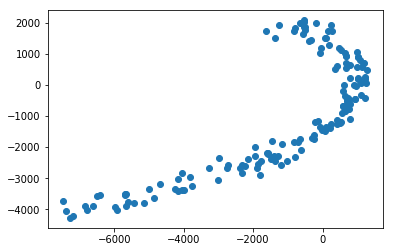

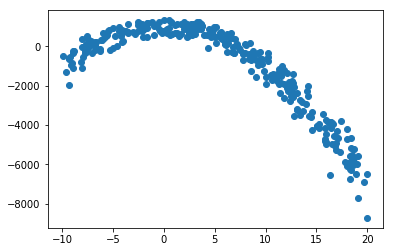

Yes we can see that there is a second order relation between Y and X1, so a higher degree model will fit the data better
0.974003862107


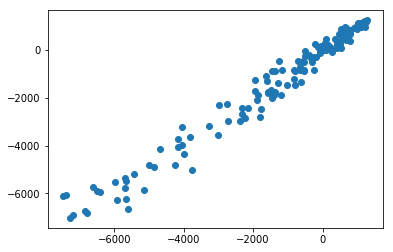

In [5]:
# Bonus
import matplotlib.pyplot as plt
# Show a graph between the predicted Y^ and the Ground truth Y
plt.scatter(Y, predicted)
plt.show()
# Try to plot Y vs X_1 in train set.
plt.scatter(train_data[:,1], train_data[:,0])
plt.show()
# can it help you improve your model?

print "Yes we can see that there is a second order relation between Y and X1, so a higher degree model will fit the data better"
# construct the better model.
# Y = Beta1*X1^2 + Beta2*X2 + Beta0
X1sq = train_data[:,1]**2
X = np.c_[np.ones(train_data.shape[0]), X1sq, train_data[:,2]]

Ytrain = train_data[:,0]
Beta = np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), (np.matmul(X.transpose(), Ytrain)))

Xtest = np.c_[np.ones(test_data.shape[0]),test_data[:,1]**2, test_data[:,2]]
predicted = np.matmul(Xtest, Beta)
res = predicted - Y
sse = np.sum(res**2)

r2 = 1 - (sse/stot)
print r2

plt.scatter(Y, predicted)
plt.show()


# Logistic Regression

Generaly, Logistic Regression is used to predict categorial variables. For the simple problem of 2-way classification, the output $\hat{y_i}$ is modeled as the probability that $\{X_i\}$ belongs to class $1$ (given two classes $0$, and $1$).

$$ P( \{X_i\} \in Set_1 ) = \hat{y_i}, $$ ( $y_i$ is the actual label; $y_i \in \{ 0,1 \}$ )


$\hat{y_i}$ is typically modeled as the output of a sigmoid on a linear combination of the input feature $\{X_i\}$:

$$ \mathbf {\hat{y}} = \sigma(X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }}) = \sigma_\beta(X)$$

Now, The likelihood of some given data for this model can be written as:

$${\displaystyle {\begin{aligned}L(\beta |x)&=Pr(Y|X;\beta )\\&=\prod _{i}Pr(y_{i}|x_{i};\beta )\\&=\prod _{i}\sigma_{\beta }(x_{i})^{y_{i}}(1-\sigma_{\beta }(x_{i}))^{(1-y_{i})}\end{aligned}}}$$

Unlike in the case of Linear regression, this equation has no closed form solution. Hence we will use gradient descent on the negative log-likelihood $J(\beta)$ to find the optimal $\beta$

$$
J(\beta) = \sum_i{\big( y_ilog(\hat{y_i})+ (1-y_i)log(1-\hat{y_i}) \big) }
$$

with the update equation:

$$
\beta_j = \beta_j + \alpha \times \frac{ \partial J(\beta)}{\partial \beta}
$$

## Question 2

a) You will write the code to find the optimal logistic regression model for the given data. The data contains 3 columns, each for $y, X_{1}$, and $X_{2}$ respectively. For the rate of learning $\alpha$ use a linearly decaying policy, or step-wise reduction policy. 

$$ {\displaystyle \mathbf {y} =\sigma \big( {\boldsymbol {\beta_{1} }}X_1+ {\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }}} \big) $$

b) Explore possible methods of adjusting the learning rate $\alpha$ 

In [101]:
# Load the train dataset
import math
train_data = np.load('utils/assign_1_data_2_train.npy')
# now write the code to find the parameters of the optimization.

train_length = train_data.shape[0]

def sigmoid(X, beta):
    return 1/(1 + math.exp(-1 * np.matmul(X, beta)))

def loss(X, beta, y):
    sigms = np.zeros(X.shape[0])
    #print train_length
    for i in range(0, X.shape[0]):
        sigms[i] = sigmoid(X[i,:], beta)
    lossVal = -1 * (np.dot(y, np.log(sigms)) + np.dot((1-y), np.log(1-sigms)))/train_length
    return lossVal
                                   
def gradient(X, Y, beta):
    sigms = np.zeros(X.shape[0])
    for i in range(0, X.shape[0]):
        sigms[i] = sigmoid(X[i,:], beta)
    grad = np.matmul((sigms - Y), X)/train_length
    print grad
    return grad
                                   
Y = train_data[:,0]
X = np.c_[np.ones(train_data.shape[0]),train_data[:,1:3]]

beta = [-10, 0.001, 0.001]
lossOld = loss(X, beta, Y)
lossNew = lossOld
print lossNew
print lossOld
alpha0 = 0.00001                            


6.23037044292
6.23037044292


In [102]:
# test on a validation part every 't' iterations to find when you start overfitting.
# t = ?
shuffled = np.copy(train_data)
np.random.shuffle(shuffled)
l = shuffled.shape[0]
fold = np.zeros((5,int(l/5)))
for i in range(0,5):
    start = (l*i)/5
    end = (l*(i+1))/5
    fold[i] = np.arange(start, end)

test = shuffled[fold[0].astype(int), :]
train = shuffled[np.setdiff1d(np.arange(0,l), fold[0]),:]

trainY = train[:,0]
testY = test[:,0]
trainX = np.c_[np.ones(train.shape[0]),train[:,1:3]]
testX = np.c_[np.ones(test.shape[0]),test[:,1:3]]

#print testY
lastError = 100  
numIterations = 1
overfit = False

while (not overfit) and (numIterations < 50):
    i = 0
    while i < numIterations:
        i+=1
        alpha = alpha0/(1+i)
        lossOld = lossNew
        lossNew  = loss(trainX, beta, trainY);
        grad = gradient(trainX, trainY, beta)
        beta = beta - alpha*grad
    
    trainPred = predicted = np.matmul(trainX, beta)
    testPred = predicted = np.matmul(testX, beta)
    
    for j in range(0, trainPred.shape[0]):
            if trainPred[j] < 0:
                trainPred[j] = 0
            else:
                trainPred[j] = 1
    for j in range(0, testPred.shape[0]):
            if testPred[j] < 0:
                testPred[j] = 0
            else:
                testPred[j] = 1    
        
    trainError = float(float(np.sum(trainY != trainPred))/float(train.shape[0]))
    testError = float(float(np.sum(testY != testPred))/float(test.shape[0]))
    print testError/trainError
    print numIterations    
    if (testError/trainError >= lastError):
        overfit = True
        print testError/trainError
        print numIterations
    lastError  = (testError/trainError)
    numIterations += 1

    
# Now for 't' iterations train on the entire dataset for testing on the test_data
    beta = beta = [0.01, 0.01, 0.01]
    while i < numIterations-1:
        i+=1
        alpha = alpha0/(1+i)
        lossOld = lossNew
        lossNew  = loss(X, beta, Y);
        grad = gradient(X, Y, beta)
        beta = beta - alpha*grad


[ -0.51329565   0.5259653  -30.56517003]
0.883116883117
1
[ -0.04192749   0.07277989 -10.35698695]
[ -0.04158946   0.07245816 -10.33217242]
1.11111111111
2
1.11111111111
2


In [103]:
# find the accuracy on the test set:
test_data = np.load('utils/assign_1_data_2_test.npy')
Y = test_data[:,0]
X = np.c_[np.ones(test_data.shape[0]),test_data[:,1:3]]

predicted = np.matmul(X, beta)

for i in range(0, predicted.shape[0]):
    if predicted[i] < 0:
        predicted[i] = 0
    else:
        predicted[i] = 1
print Y
print predicted
print np.sum(Y == predicted)
print test_data.shape[0]
print float(float(np.sum(Y != predicted))/float(test_data.shape[0]))

[ 0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.
  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.
  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.
  1.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.
  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  1.  0.  0.  1.  0.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.
  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  0.
  1.  1.  1.  0.  1.  0. 

In [9]:
# Bonus
# Can you adjust the learning rate alpha in a better way?


# EM algorithm

This is a general framework for likelihood-based parameter estimation.
A basic outline of this algorithm is:

* start with initial guesses of parameters

* E step: estimate memberships given params

* M step: estimate params given memberships

* Repeat until convergence

** Refer to [this link](http://www.rmki.kfki.hu/~banmi/elte/bishop_em.pdf) (9.2.2) .**


## Question 3

Let ${\displaystyle \mathbf {x} =(\mathbf {x} _{1},\mathbf {x} _{2},\ldots ,\mathbf {x} _{n})} $ be a sample of $n$ independent observations from a mixture of two multivariate normal distributions of dimension $d$ , and let ${\displaystyle \mathbf {z} =(z_{1},z_{2},\ldots ,z_{n})} $ be the latent variables that determine the component from which the observation originates.

$X_i |(Z_i = 1) \sim \mathcal{N}_d(\boldsymbol{\mu}_1,\Sigma_1)$ and $X_i |(Z_i = 2) \sim \mathcal{N}_d(\boldsymbol{\mu}_2,\Sigma_2)$

The aim is to estimate the unknown parameters representing the mixing value between the Gaussians and the means and covariances of each:

$$ \theta = \big( \boldsymbol{\tau},\boldsymbol{\mu}_1,\boldsymbol{\mu}_2,\Sigma_1,\Sigma_2 \big) $$

a) Given the data, find the parameters $\theta$ using EM algorithm.



In [10]:
# Load the train dataset 
from scipy.stats import multivariate_normal
data = np.load('utils/assign_1_data_3.npy')
# The data is a 1000*2 numpy array, where each row is a independent observation, and 
# the columns are measurement in dimension x and y respectively. 
# now write the code to find the parameter theta.
#print data
dt =  data.transpose()
print dt.shape

mu1_index = np.random.randint(0, data.shape[0])
mu2_index = np.random.randint(0, data.shape[0])

mu1 = data[mu1_index]
mu2 = data[mu2_index]

print mu1
print mu2
cov1 = np.cov(dt)
cov2 = np.cov(dt)
print cov1
print cov2

for i in range(0,50):
    normal1 = multivariate_normal(mu1, cov1)
    normal2 = multivariate_normal(mu2, cov2)

    weights =  np.zeros(data.shape)
    weights[:,0] = normal1.pdf(data)
    weights[:,1] = normal2.pdf(data)
    #print weights
    sum = (weights[:,0] + weights[:,1])
    weights[:,0] = np.divide( weights[:,0], sum)
    weights[:,1] = np.divide( weights[:,1], sum)
    #print weights

    mu1 = np.average(data, weights = weights[:,0], axis = 0)
    mu2 = np.average(data, weights = weights[:,1], axis = 0)

    cov1 = np.cov(dt, aweights = weights[:,0])
    cov2 = np.cov(dt, aweights = weights[:,1])

    print mu1, mu2
    print cov1, cov2
    i+=1


(2, 1000)
[ 62.61424657  51.45044505]
[ 54.29367752  56.98163577]
[[  84.57055459  -26.3396111 ]
 [ -26.3396111   176.6314843 ]]
[[  84.57055459  -26.3396111 ]
 [ -26.3396111   176.6314843 ]]
[ 59.75242214  62.38205093] [ 52.29546474  67.30961964]
[[  95.24238741  -14.01147401]
 [ -14.01147401  133.91126053]] [[  55.8708016   -19.87331677]
 [ -19.87331677  194.71440203]]
[ 59.4511416   61.92407296] [ 51.47201306  68.43594437]
[[ 102.32774023   -8.50571607]
 [  -8.50571607  117.21731324]] [[  38.92870193  -17.71252919]
 [ -17.71252919  209.40355153]]
[ 59.92654293  60.87763995] [ 50.93727869  69.4716456 ]
[[ 103.33916795    0.55504533]
 [   0.55504533  101.2256481 ]] [[  28.98944173  -13.97508788]
 [ -13.97508788  210.13324951]]
[ 60.41356386  59.61577165] [ 50.51098843  70.60131548]
[[ 100.4669707    12.42806988]
 [  12.42806988   86.23962017]] [[  23.52509664   -9.70756068]
 [  -9.70756068  201.27418308]]
[ 60.77104777  58.31289807] [ 50.19791162  71.76872643]
[[ 96.41207943  25.51027

In [11]:
# Parameters are given by:
print "The weights are given by the following matrix: "
print weights
print "The mean and covariance matrices are given by the following: "
print mu1, cov1
print mu2, cov2

The weights are given by the following matrix: 
[[  4.58953580e-05   9.99954105e-01]
 [  9.86757068e-01   1.32429324e-02]
 [  2.34192246e-08   9.99999977e-01]
 ..., 
 [  5.07855972e-10   9.99999999e-01]
 [  9.99998661e-01   1.33862752e-06]
 [  6.17665298e-01   3.82334702e-01]]
The mean and covariance matrices are given by the following: 
[ 60.52690181  55.29997291] [[ 92.83753904  52.30833545]
 [ 52.30833545  58.5897627 ]]
[ 49.92776409  75.42762914] [[ 20.27160455   1.90052145]
 [  1.90052145  92.00185696]]


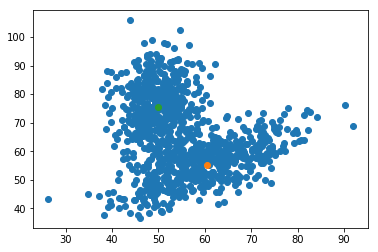

In [12]:
from matplotlib.mlab import bivariate_normal
# Visualize the entire data by plotting them as points in a 2-D canvas.  
# Show the estimated means and the standard deviations.

plt.scatter(data[:,0], data[:,1])
plt.scatter(mu1[0], mu1[1])
plt.scatter(mu2[0], mu2[1])
plt.show()

# Clustering

For clustering we covered two algorithms

1) K-means : An iterative method to get 'K' clusters, initializing them randomly

2) Hirarchical : An iterative method to get a dendogram of clustering with various numbers of cluster centers.

### K-means Clustering

We initialize $K$ cluster centers $\{ c_1,c_2 ,... c_k\}$for $K$-clusters randomly. All the data points are assigned a cluster index $D_i \in \{ 1,2,...,k\}$, based on the closest cluster center to each point.

Now, for each cluster, the cluster centers are re-evaluated as the mean of all the points in the center.

$$
c_i = mean(\{ X_j | D_j = i \})
$$
This process continues till convergence.


## Question 4

The dataset contains 1000  color images.Convert them to grayscale images. We need to cluster them into various $n$ clusters based on the similarity of their histograms. For each image, find the histogram with bin size 25 (last bin of 30;i.e.225-255;giving you 10 bins). Now treating each of these bins as seperate dimensions, find:

a) Cluster Centers for $n = 5$ clusters, with $L_2$ distance criteria for measuring distance between a pair of images.

b) **Bonus**: Use Earth Movers Distance in the above problem.

In [13]:
# For this problem we will be using the 1000 test images of CIFAR-10 dataset.
## Load the data from the following link
# https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

batch = unpickle("/home/kunal/Downloads/IISC/sem2/DLCV/DLCV-assignments/cifar-10-batches-py/test_batch")

In [14]:
# Convert it to grayscale values
grayscaleData = np.zeros((10000, 1024))

data = batch["data"]
data16 = data.astype(np.uint16)
#print data[:,0]
for j in range(0,1024):
    #print data16[:,j] 
    #print data16[:,j+1024]
    #print data16[:,j+2048]
    #print (data16[:,j] + data16[:,j+1024] + data16[:,j+2048])
    grayscaleData[:,j] = (data16[:,j] + data16[:,j+1024] + data16[:,j+2048])/3
    #print grayscaleData
#print grayscaleData

# The variable newData contains the grayscale values of all 10000 test images 

In [15]:
# find the histograms and get a 10-dimensional representation of each images.
grayscaleHist = np.zeros((10000, 10))
print grayscaleData.shape
for i in range(0, 10000):
    hist , bin_edges = np.histogram(grayscaleData[i,:] ,bins=10, range = (0,255))
    grayscaleHist[i, :]  = hist
print grayscaleHist.shape
print grayscaleHist.astype(int)

(10000, 1024)
(10000, 10)
[[  0  22  99 ...,  45  15  10]
 [100  55  47 ...,  79 114 294]
 [ 12 138  93 ...,  66  98  93]
 ..., 
 [429 219  69 ...,  22   7   6]
 [ 64  98 124 ...,  33  29  27]
 [  1  76 180 ...,  11  18  48]]


In [16]:
# Use K-means to find  out the number of cluster centers.
centres_ind = np.random.randint(0,10000, size = 5)
#print centres_ind
centres = grayscaleHist[centres_ind,:]
#print centres
centresUpdated = True
centrebins = dict()
k =0
closest = 0
centre_diff = 21
# the sum of squared diff between iterations, when less than 20 has been used as a convergence hyperparameter.
while centre_diff > 20:
    centresOld  = np.copy(centres)
    for r in range(0,5):
        centrebins[r] = []
    for i in range(0,10000):
        for j in range(0,5):
            if (j==0):
                minm = (np.sum((grayscaleHist[i] - centres[j])**2))
                closest = 0
            else:
                dist = (np.sum((grayscaleHist[i] - centres[j])**2))
                if (dist < minm):
                    minm = dist
                    closest = j   
        centrebins[closest].append(i)
        
    for l in range(0,5):
        #print  grayscaleHist[centrebins[l]].shape
        centres[l] =  np.round(np.mean(grayscaleHist[centrebins[l]].astype(int),0))
    #print centres - centresOld
    centre_diff = np.sum(np.sum((centres - centresOld)**2, 1), 0)
    #print centre_diff
    
    k+=1

print centres

[[  26.   49.   77.   85.   88.   77.   74.   66.   88.  395.]
 [  21.   44.   70.   94.  152.  260.  258.   84.   27.   14.]
 [  31.   54.   80.   91.   98.   99.  133.  209.  174.   54.]
 [  17.   47.  119.  236.  292.  161.   75.   39.   23.   16.]
 [ 101.  173.  219.  164.  115.   82.   65.   45.   33.   26.]]


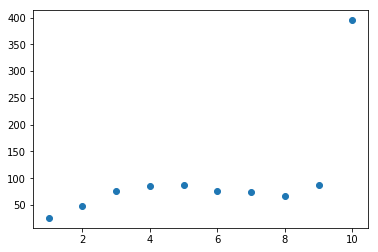

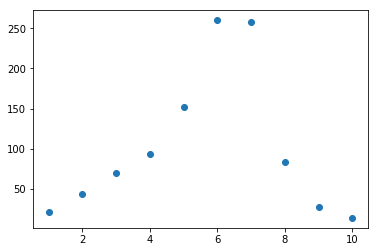

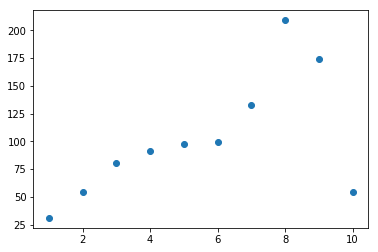

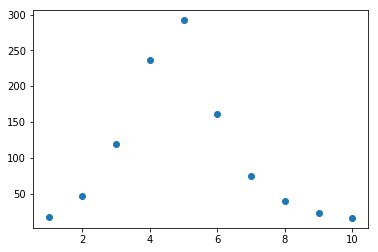

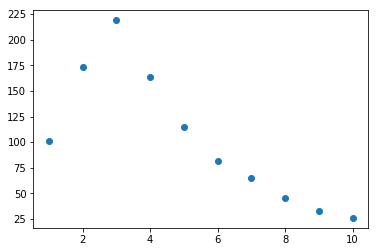

Here the X axis is the bin number which is defined as mentioned above ([0-25, [25-50] ... [225, 255])
The cluster means are histograms with each showing high frequency for a certain range of grayscale values (low, mid or high)


In [17]:
# Visualize cluster means to see what they look like.
a = np.array([1,2,3,4,5,6,7,8,9,10])
for i in range(0,5):
    plt.scatter(a, centres[i])
    plt.show()
    
print "Here the X axis is the bin number which is defined as mentioned above ([0-25, [25-50] ... [225, 255])"
print "The cluster means are histograms with each showing high frequency for a certain range of grayscale values (low, mid or high)"

# References

Useful references will be added shortly.

1) Linear Regression
  * [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

2) Logistic Regression
  * [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)
  * [Win Vector Blog](http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/)
  * [Renselaer Course Slides](http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect09.pdf)
  
3) EM
  * [Cambridge Tutorial](http://www.cs.huji.ac.il/~yweiss/emTutorial.pdf)
  * [Chapter 9 - Pattern Recognition and Machine Learning by Christopher M. Bishop](http://www.rmki.kfki.hu/~banmi/elte/bishop_em.pdf)
  * [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)
  
4) K-means
  * [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)